<a href="https://colab.research.google.com/github/nkanu17/medium_blogs/blob/main/A_Byte_Sized_Comparison_of_TensorFlow_Versions_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1
How can we perform computations in TensorFlow 1? The following code shows a simple matrix multiplication problem and how it can be executed using TensorFlow 1:

In [ ]:
import tensorflow as tf

# Build the computation graph
x = tf.constant([1, 2, 3], name='x')
y = tf.constant([4, 5, 6], name='y')
z = tf.multiply(x, y, name='z')

# Start and execute computation in a session
with tf.Session() as sess:
    result = sess.run(z)
    print(f"Output: {result}")
# Output: [4 10 18]

## Example 1 without sessions

In [6]:
import tensorflow as tf

# Eager Execution is on by default in TensorFlow 2.x
x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])
z = tf.multiply(x, y)
# The result is immediately available
print(z)
# Output: [ 4 10 18]

tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


# A simple neural network comparison with TensorFlow Sequential and Functional APIs
Let’s walk through how to build a simple text classification model that takes in strings as input and classifies them as positive or negative. The objective here is to observe the differences between using these two APIs; therefore, we are using mock data will be used and not focusing on model building. For more detailed information on building text-based models, please take a look at TensorFlow tutorials or TensorFlow Hub tutorials.

## Set-up input data

We will use the same input for both sequential and functional API models. The following code describes four sentences that become converted into the format required for a neural network, which involves the tokenization of the sentences.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Mock input
sentences = [
    "I love machine learning a lot",
    "I really do not like TensorFlow",
    "Tensorflow is amazing!",
    "Not having eager execution was frustrating!",
]

# Define the labels, 1 for positive and 0 for negative
labels = np.array([1, 0, 1, 0])

# Tokenize of input
max_words = 64
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
sentences_as_sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences
X_train = pad_sequences(sentences_as_sequences)

# Will be used below
embedding_size = 32

## Model with Sequential API

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(embedding_size, 16, input_length=X_train.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6918 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6897 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6879 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6862 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6846 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6829 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6813 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6799 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6784 - accuracy: 1.0000


In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 6, 16)             512       
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


## Model with Functional API

In [18]:
# Use the functional API to create the model
inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))
embedding = tf.keras.layers.Embedding(embedding_size, 16, input_length=X_train.shape[1])(inputs)
pooling = tf.keras.layers.GlobalAveragePooling1D()(embedding)
dense1 = tf.keras.layers.Dense(16, activation='relu')(pooling)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense1)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6954 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6889 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6873 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6859 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6844 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6815 - accuracy: 1.0000


In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 embedding_7 (Embedding)     (None, 6, 16)             512       
                                                                 
 global_average_pooling1d_7   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_____________________________________________________________

## Plot the graph

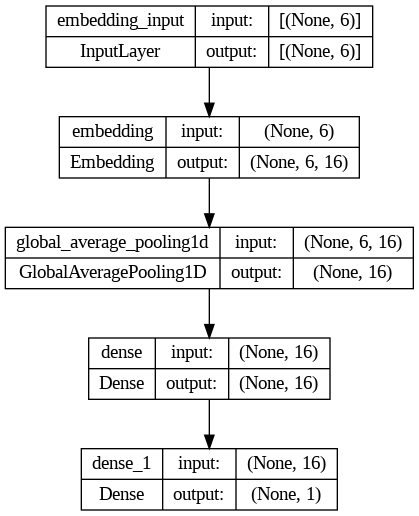

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)